In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("country_data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


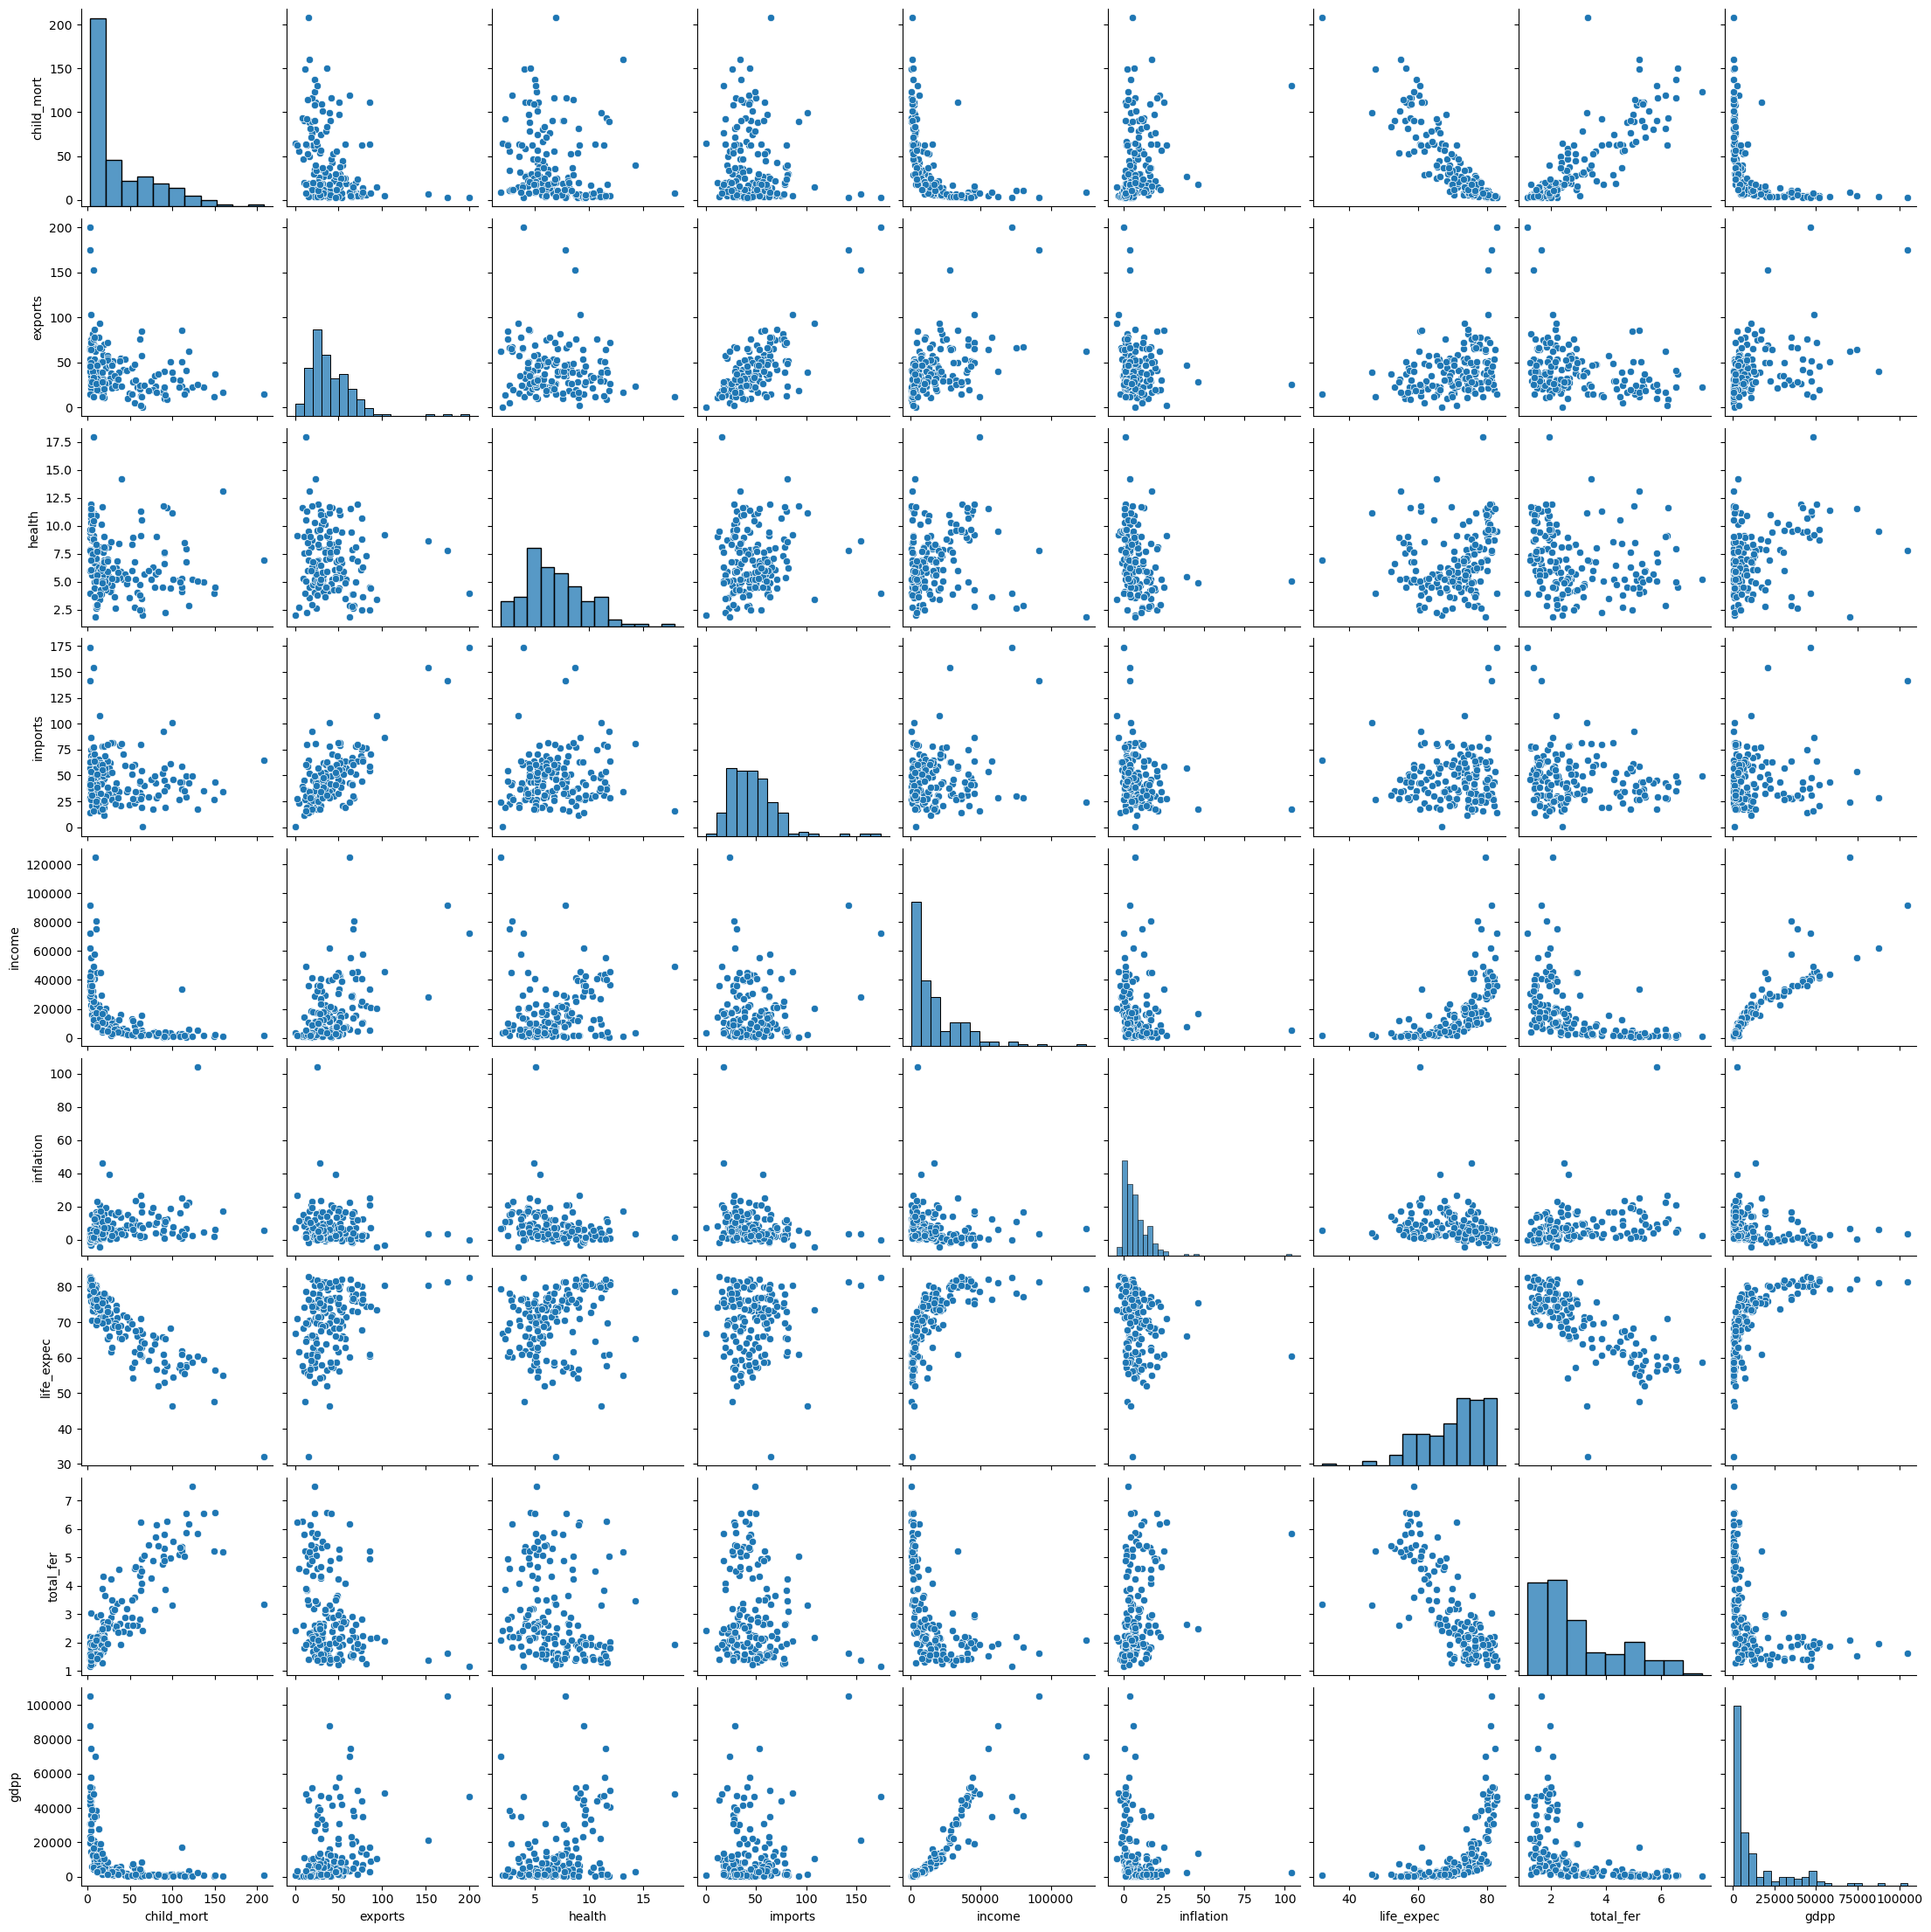

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df)

In [6]:
df1=df.drop("country",axis=1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df2=pd.DataFrame()
df2[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']]=sc.fit_transform(df1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']])

df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [11]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4,n_init='auto')
km.fit(df2[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']])
km.labels_

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 3, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [12]:
df2['cluster']=km.labels_

In [13]:
km.inertia_

700.6881807887597

In [14]:
km.cluster_centers_

array([[-0.82860929,  0.17262066,  0.85918977, -0.29637276,  1.46227512,
        -0.47818851,  1.10764922, -0.76368146,  1.66190214],
       [ 1.3665148 , -0.4713914 , -0.20516272, -0.23436628, -0.69749902,
         0.39831535, -1.25890311,  1.3583183 , -0.61048554],
       [-0.42322882,  0.02493975, -0.18515582,  0.0719796 , -0.21154514,
        -0.03290285,  0.25584479, -0.43464285, -0.32743259],
       [-0.84900324,  4.93567278, -0.00816303,  4.54805768,  2.4395424 ,
        -0.50420614,  1.22682431, -1.03886271,  2.44079735]])

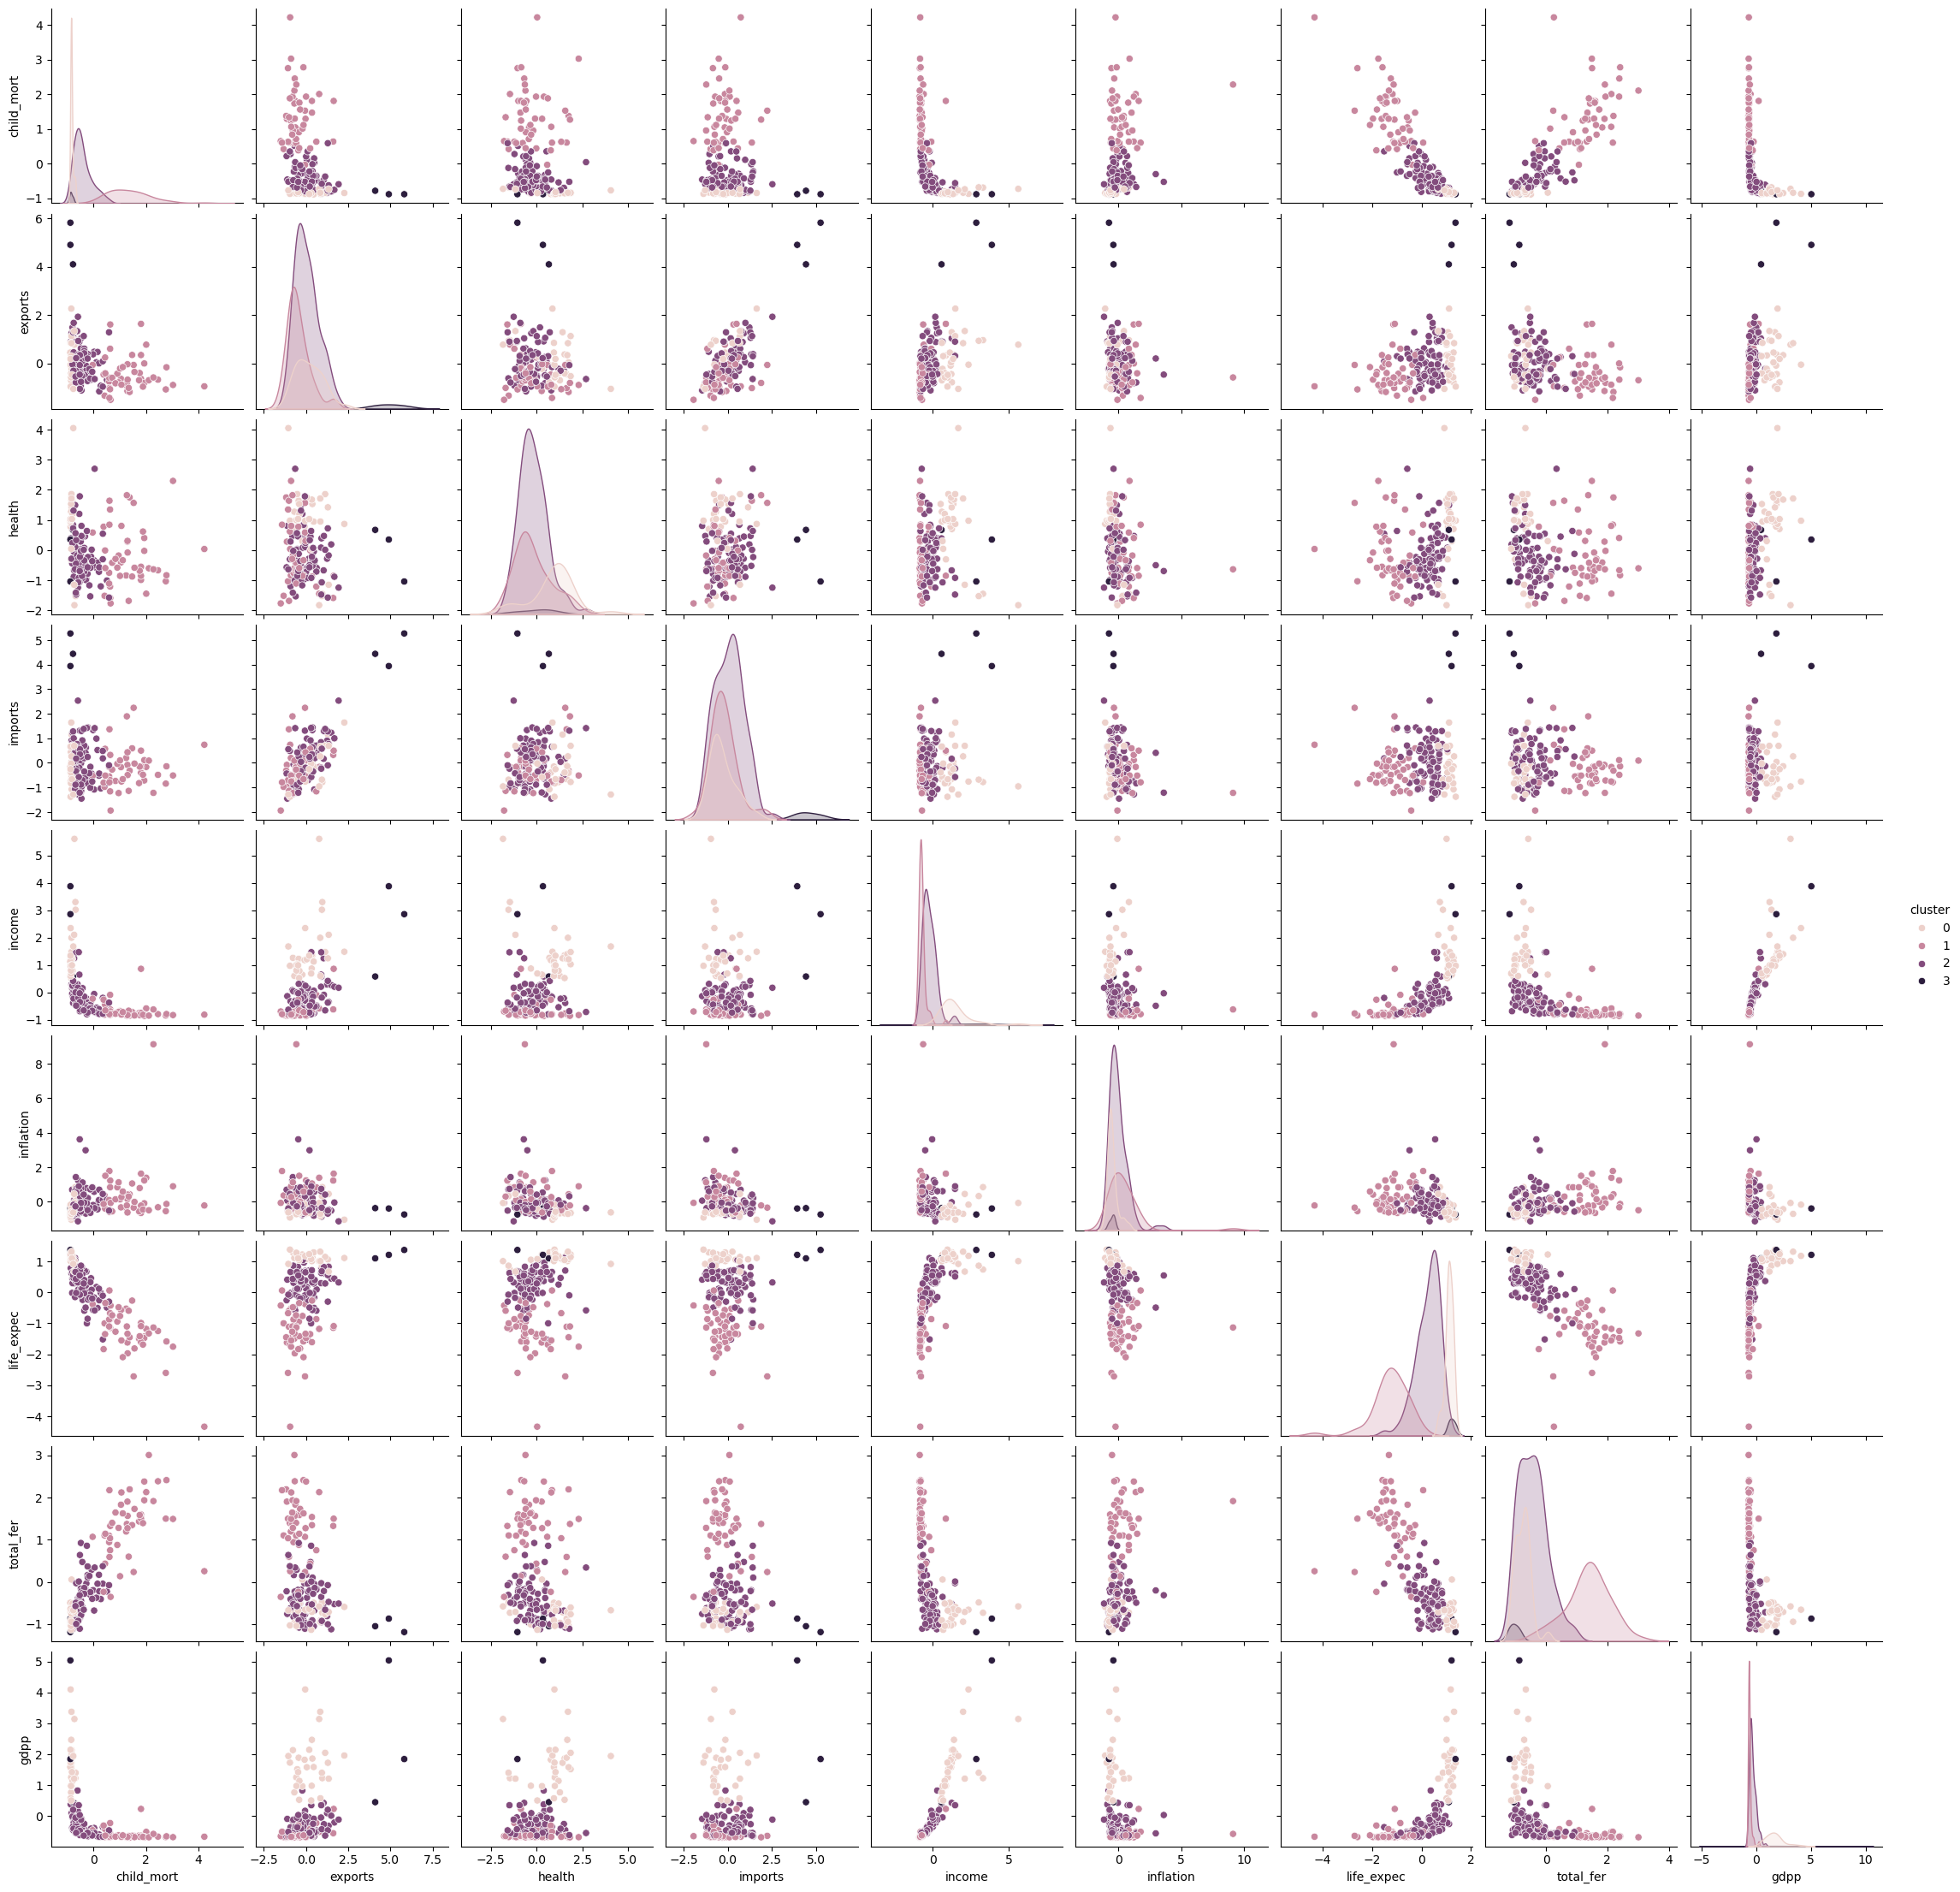

In [16]:
sns.pairplot(df2,hue='cluster')
plt.show()

In [19]:
from scipy.cluster.hierarchy import dendrogram,fcluster,linkage


In [21]:
X=df2[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']]
Z=linkage(X,method='complete')
print(Z)

[[4.10000000e+01 1.21000000e+02 2.70510920e-01 2.00000000e+00]
 [7.50000000e+01 1.39000000e+02 3.45939626e-01 2.00000000e+00]
 [2.40000000e+01 8.50000000e+01 4.23131474e-01 2.00000000e+00]
 [1.11000000e+02 1.58000000e+02 4.94330379e-01 2.00000000e+00]
 [1.00000000e+02 1.69000000e+02 5.39700004e-01 3.00000000e+00]
 [6.00000000e+01 1.22000000e+02 5.44105161e-01 2.00000000e+00]
 [1.00000000e+00 4.80000000e+01 5.59540632e-01 2.00000000e+00]
 [5.30000000e+01 1.44000000e+02 5.68799380e-01 2.00000000e+00]
 [2.90000000e+01 5.40000000e+01 5.90319960e-01 2.00000000e+00]
 [2.00000000e+01 1.30000000e+02 6.04562360e-01 2.00000000e+00]
 [6.00000000e+00 7.60000000e+01 6.13397046e-01 2.00000000e+00]
 [1.30000000e+01 1.67000000e+02 6.15453682e-01 3.00000000e+00]
 [5.60000000e+01 1.29000000e+02 6.27531275e-01 2.00000000e+00]
 [4.30000000e+01 1.35000000e+02 6.39912838e-01 2.00000000e+00]
 [5.10000000e+01 9.00000000e+01 6.49519933e-01 2.00000000e+00]
 [1.18000000e+02 1.52000000e+02 6.51379582e-01 2.000000

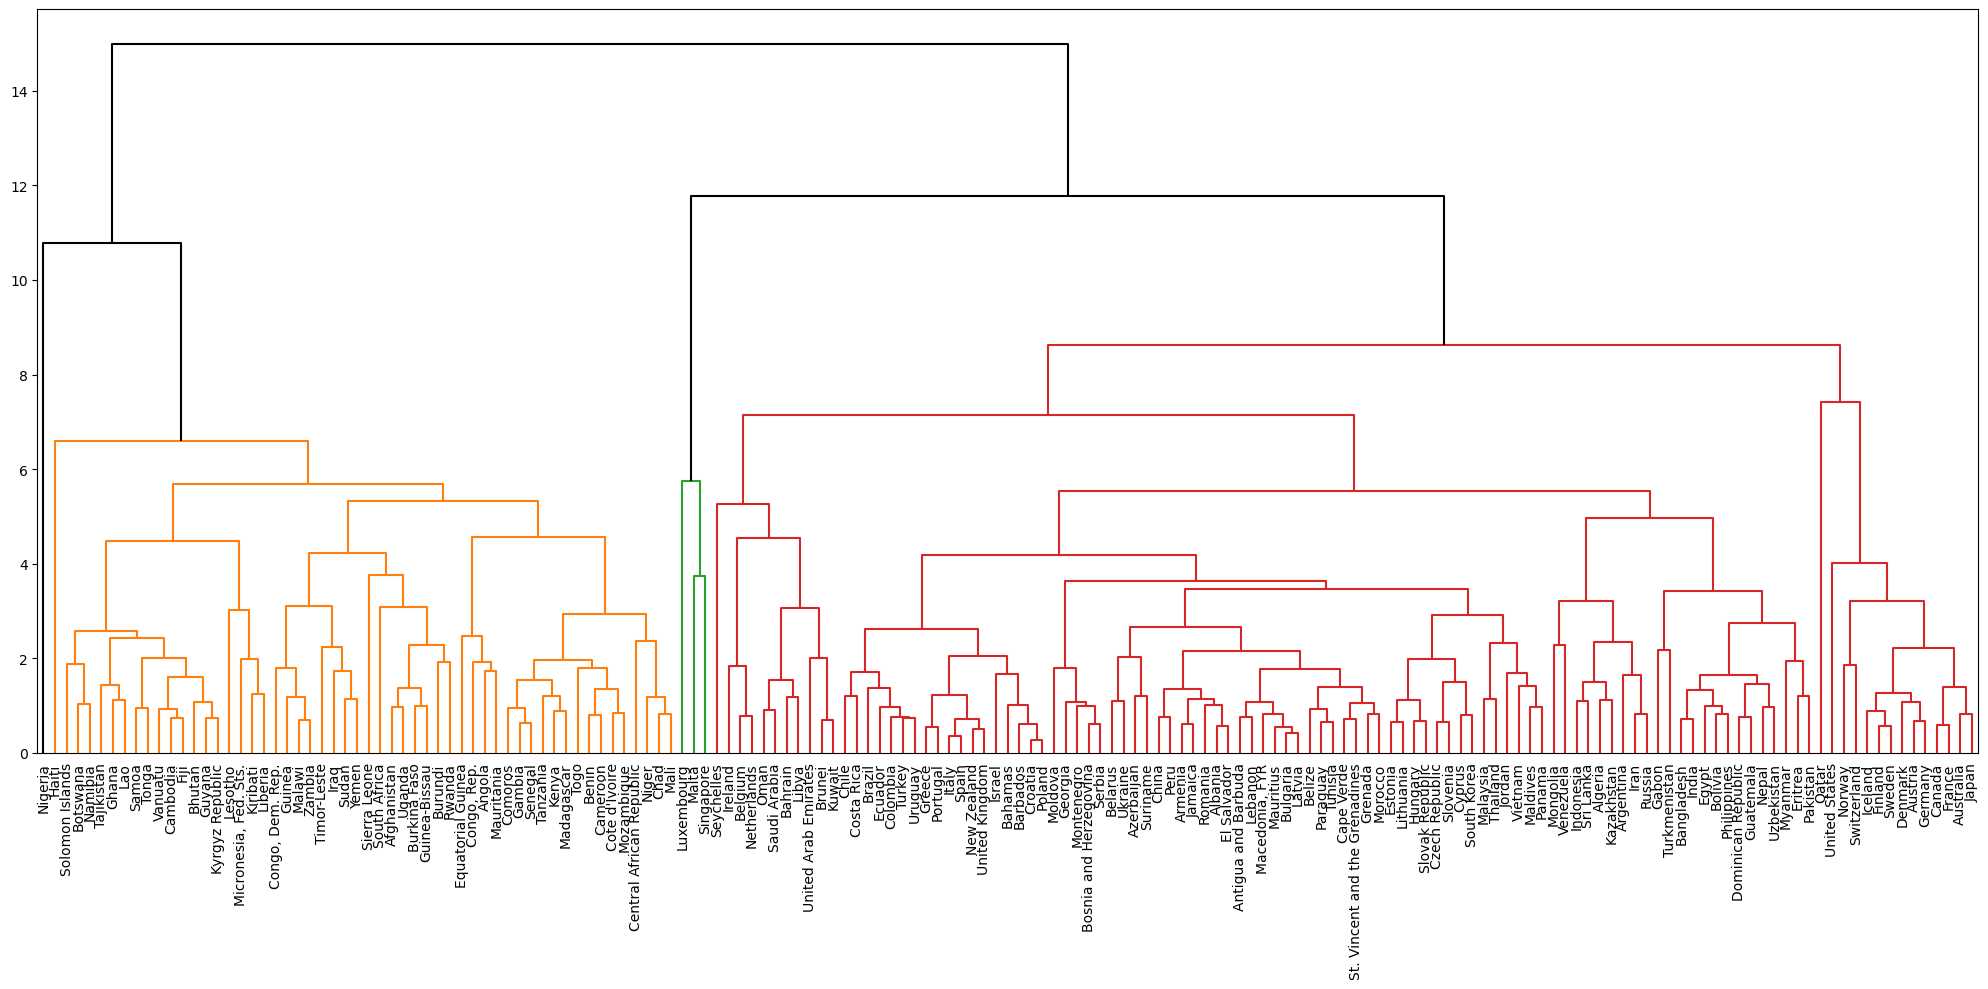

In [34]:
subset=df.iloc[:50]
X=df2[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']]
Z=linkage(X,method='complete')
plt.figure(figsize=(20,10))
dendrogram(Z,labels=df['country'].values,leaf_rotation=90, leaf_font_size=10, above_threshold_color='black')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()